#### Setup

In [1]:
import os
import numpy as np
import glob
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary
import torch.optim as optim
from time import time
import matplotlib.pyplot as plt
import IPython.display as ipd

# Our scripts
from lib.loss.Loss_1D import compute_grad, waveLoss_1D
from lib.loss.Loss_sphere import *
from lib.dataset.dataset_1D import create_training_data
from lib.model.PINNs import *
from lib.dataset.exact_1D_grid import *

## 1D

In [2]:
n_sources = 1 # Number of wave sources [1, 2]

In [3]:
# Move elements to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PINN_Model_1D().to(device)

# Load trained model parameters and loss history
# current_dir = os.path.dirname(os.path.abspath(__file__)) 
current_dir = os.getcwd()
model_dir = os.path.join(current_dir, 'lib/weights')

# If moving between 1 source and 2 source models, change the filename accordingly and go to exact_1D_grid.py and change SOURCES to 1 or 2.

load_path = os.path.join(model_dir, f'{model.__class__.__name__}_1D_{n_sources}source.pth') #Include _good for the good model
model.load_state_dict(torch.load(load_path, map_location=device))
    
loss_history = np.load(os.path.join(model_dir, f'{model.__class__.__name__}_1D_loss_history_{n_sources}source.npy')) # include _good for the good model

### Exact solution

Calculating Fourier coefficients...
Computing solution grid...
Plotting...
Figure(800x600)


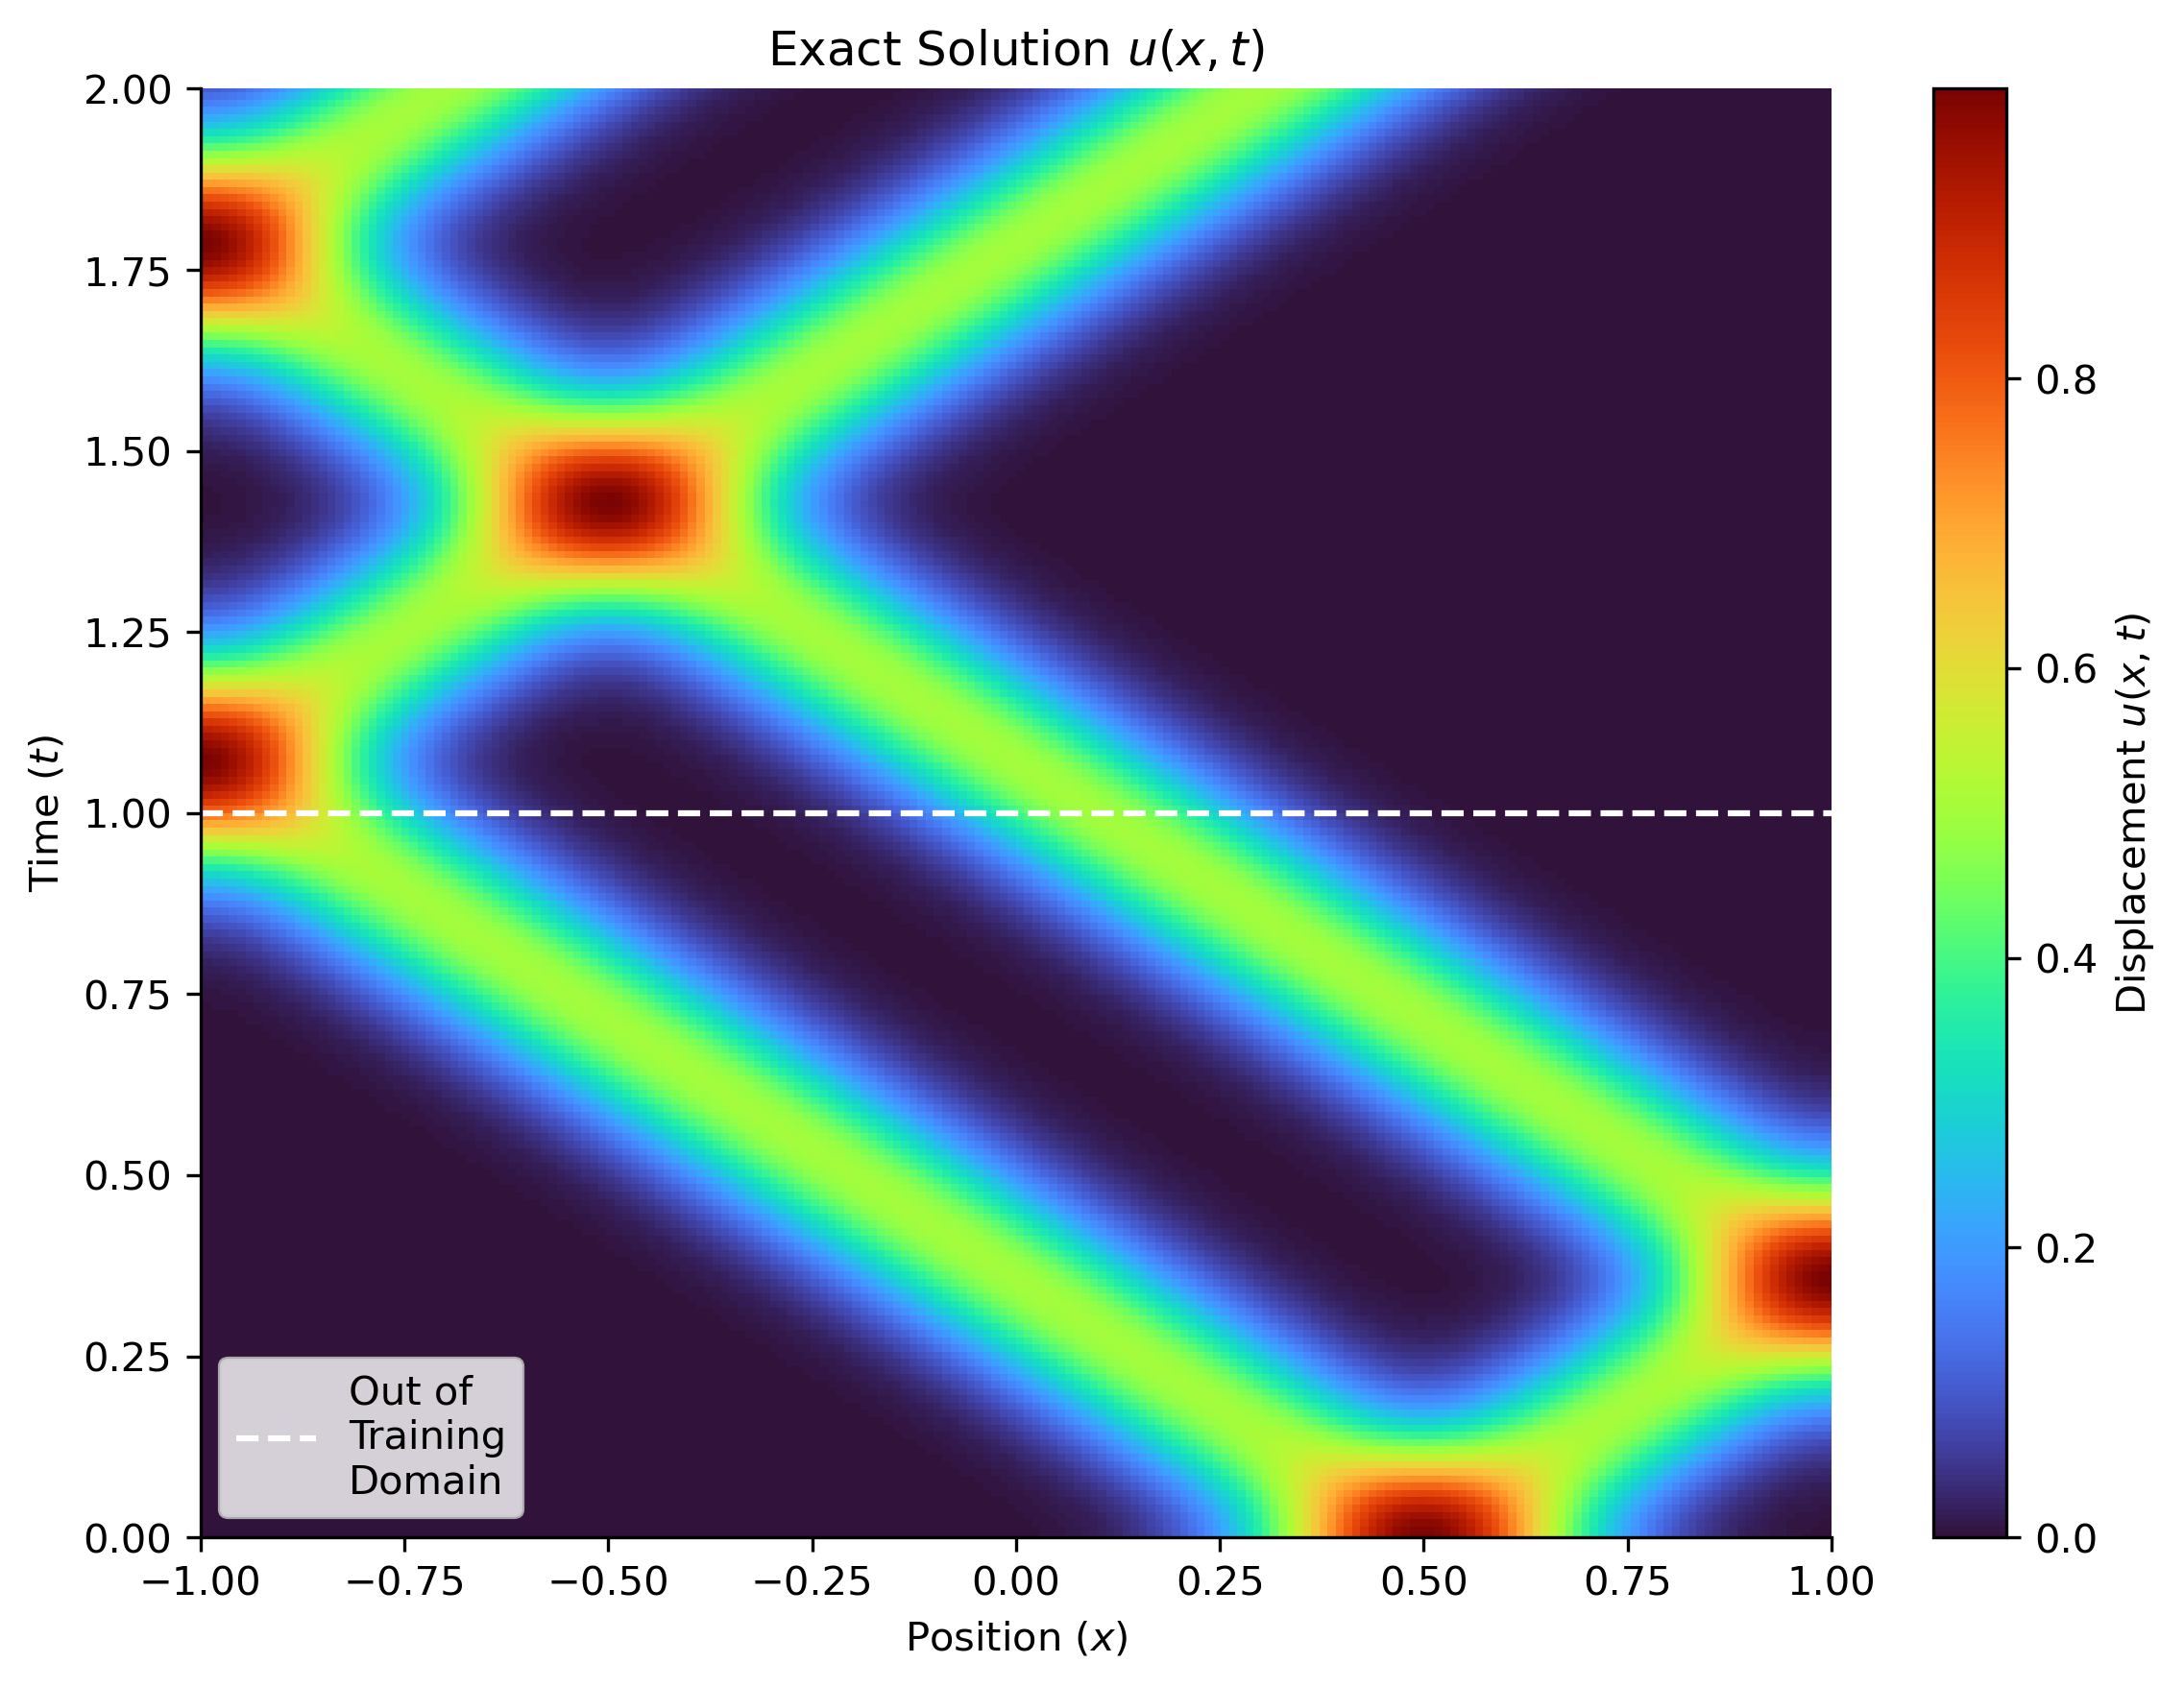

In [4]:
!python lib/dataset/exact_1D_grid.py --sources {n_sources}

filename = f"exact_solution_1D_{n_sources}_sources_heatmap.png"

# Display the image
ipd.display(ipd.Image(filename=filename))

### Predict

Computing Exact Solution...
Predicting with PINN model...


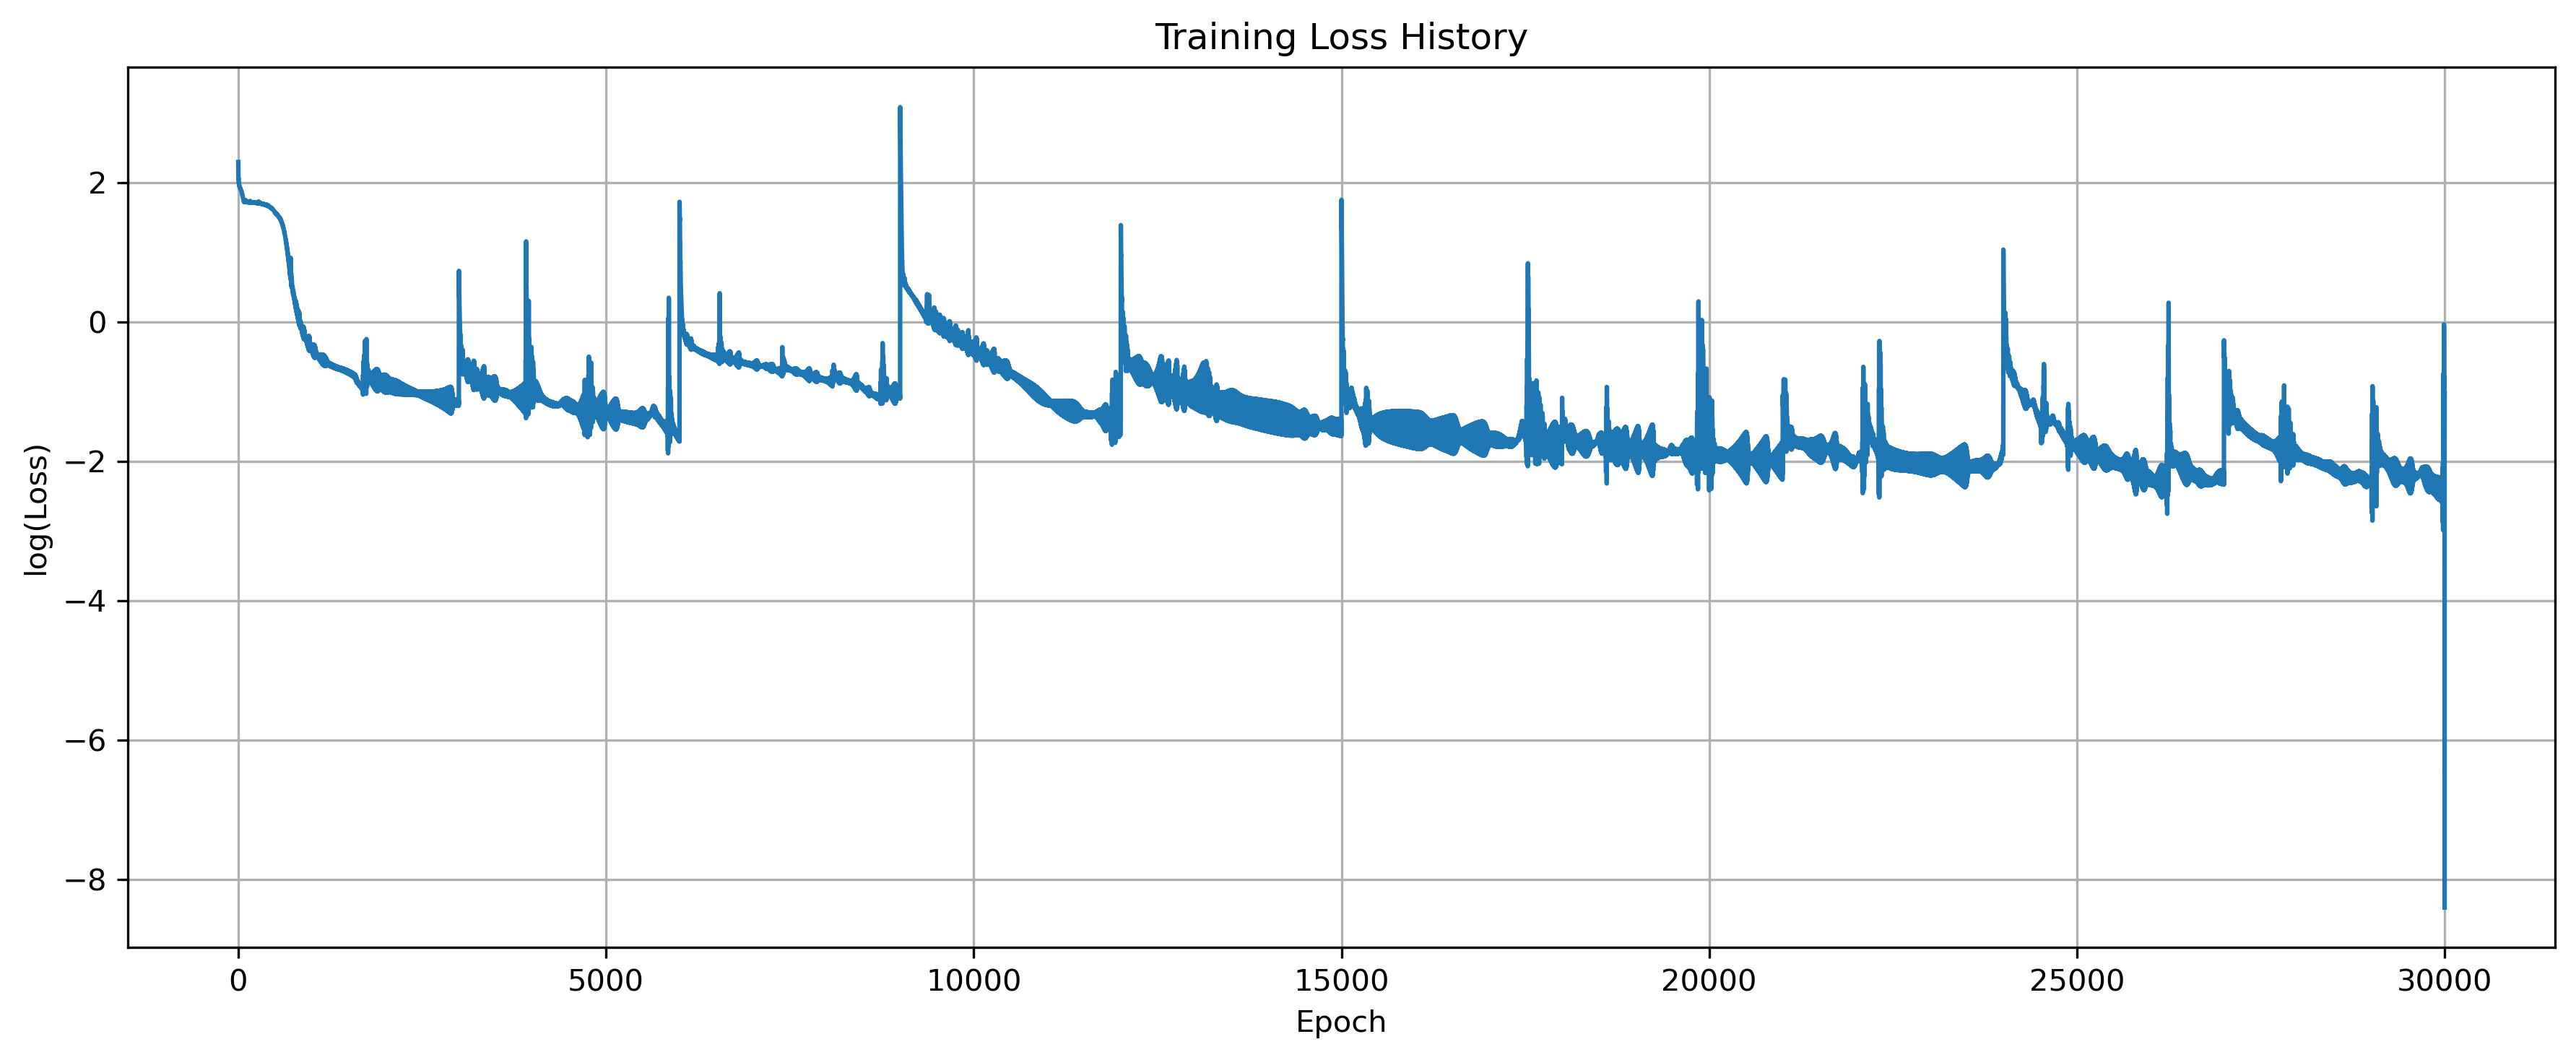

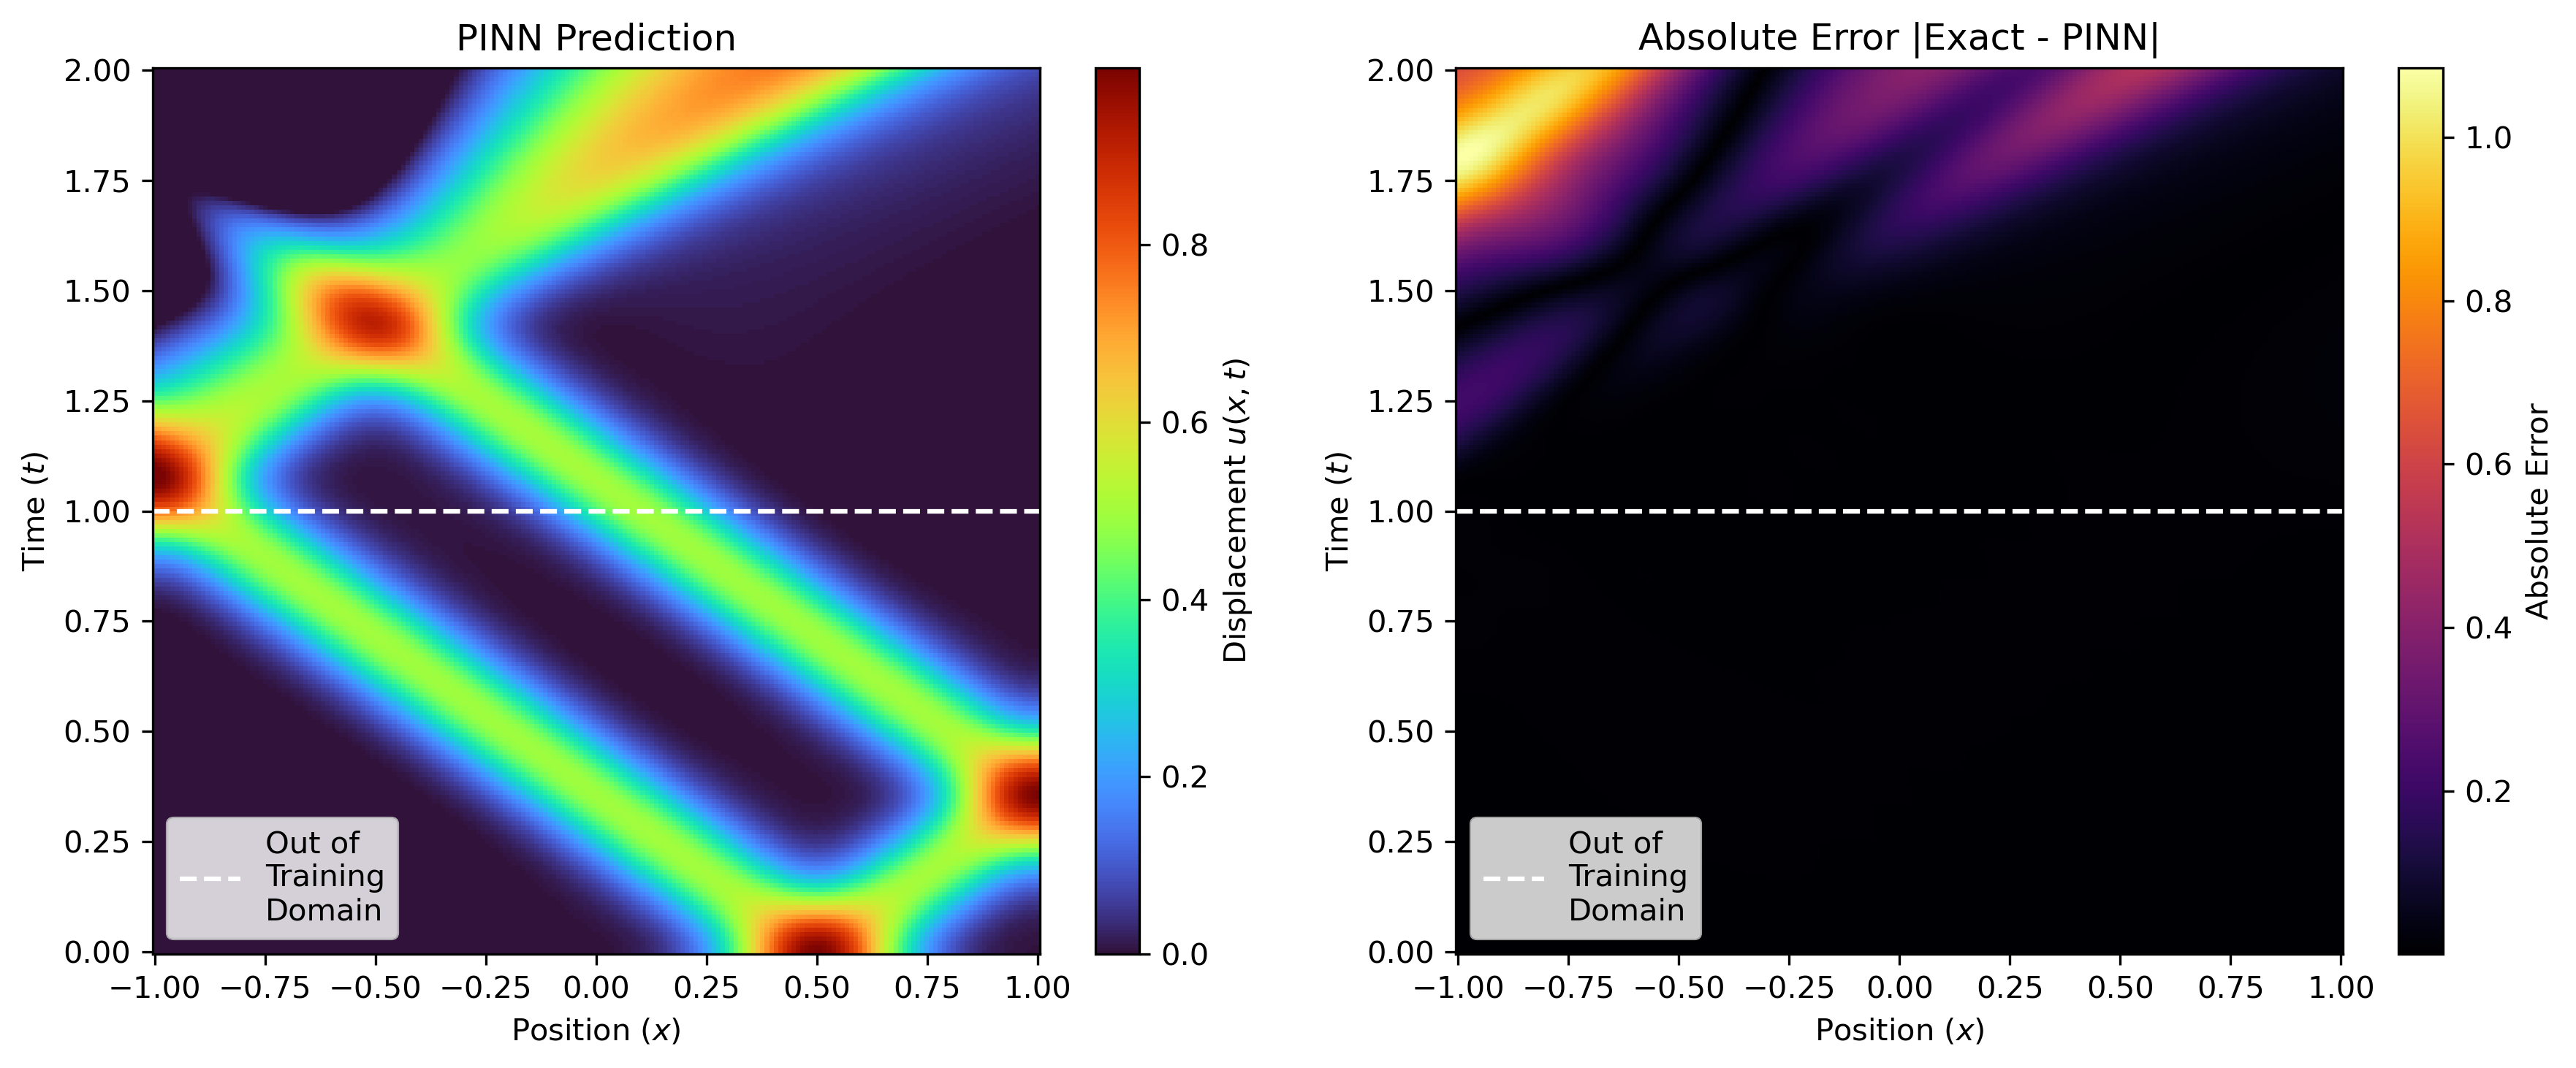

In [5]:
!python predict_1d.py {n_sources}

# Display images
ipd.display(ipd.Image(filename=f"PINN_1D_Wave_Equation_Loss_History_{n_sources}source.png"))
ipd.display(ipd.Image(filename=f"PINN_1D_Wave_Equation_{n_sources}_Results.png"))

## 3D

In [6]:
time = 0.694 #Set the time for the wanted comparison [0:2]

In [7]:
# Move elements to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PINNModel_Sphere().to(device)

# Load trained model parameters and loss history
# current_dir = os.path.dirname(os.path.abspath(__file__)) 
current_dir = os.getcwd()
model_dir = os.path.join(current_dir, 'lib\weights')

# If moving between 1 source and 2 source models, change the filename accordingly and go to exact_1D_grid.py and change SOURCES to 1 or 2.

load_path = os.path.join(model_dir, f'{model.__class__.__name__}.pth') #Include _good for the good model
model.load_state_dict(torch.load(load_path, map_location=device))

<All keys matched successfully>

### Exact solution

Saved data to wave_sphere_exact_0.694.npz


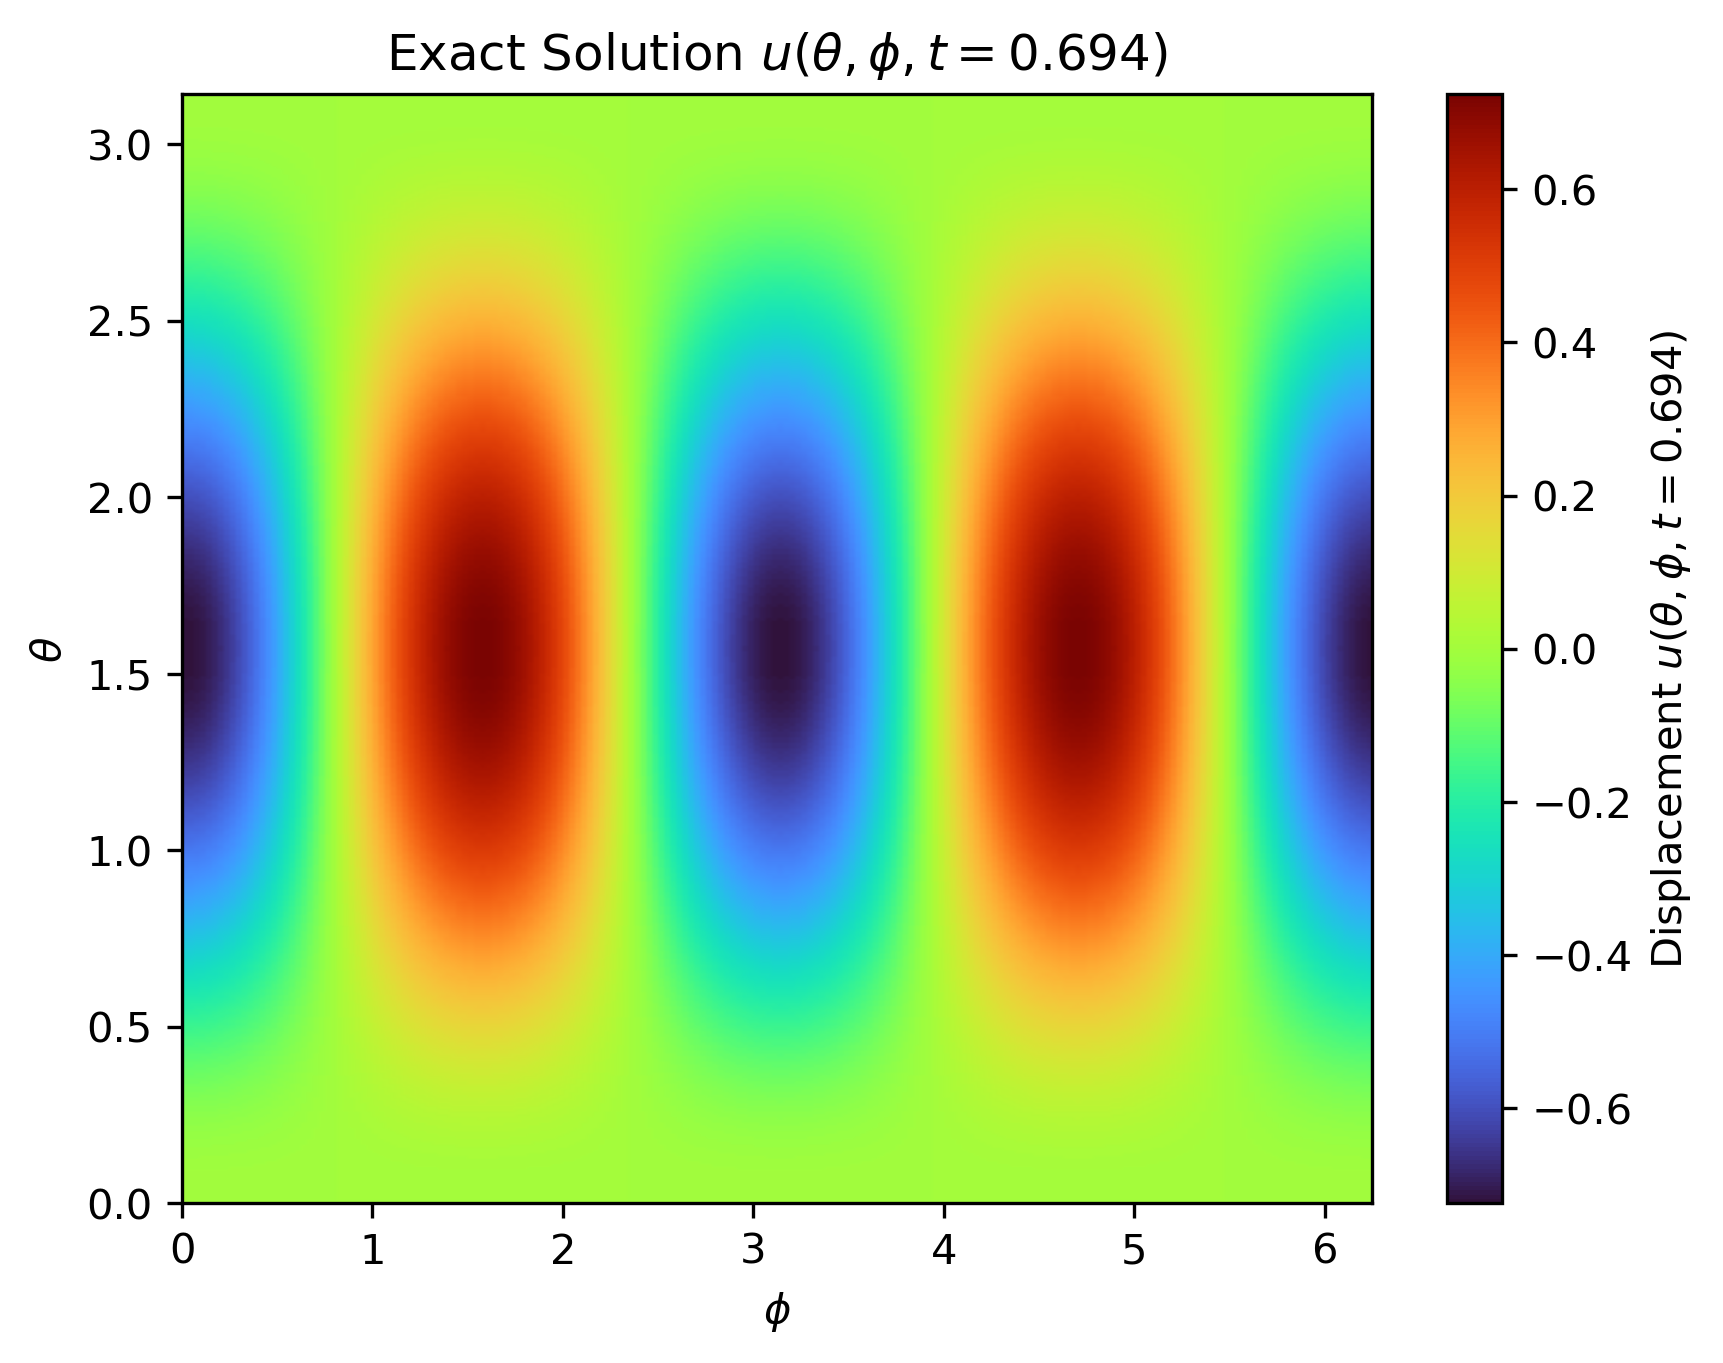

In [8]:
!python lib/dataset/sphre.py {time}

filename = f'wave_sphere_exact_{time:.3f}.png'
# Display the image
ipd.display(ipd.Image(filename=filename))

### Predict

Plotting t = 0.6939
Combined figure saved: u3D_pred_and_error_2D_t0.694.png


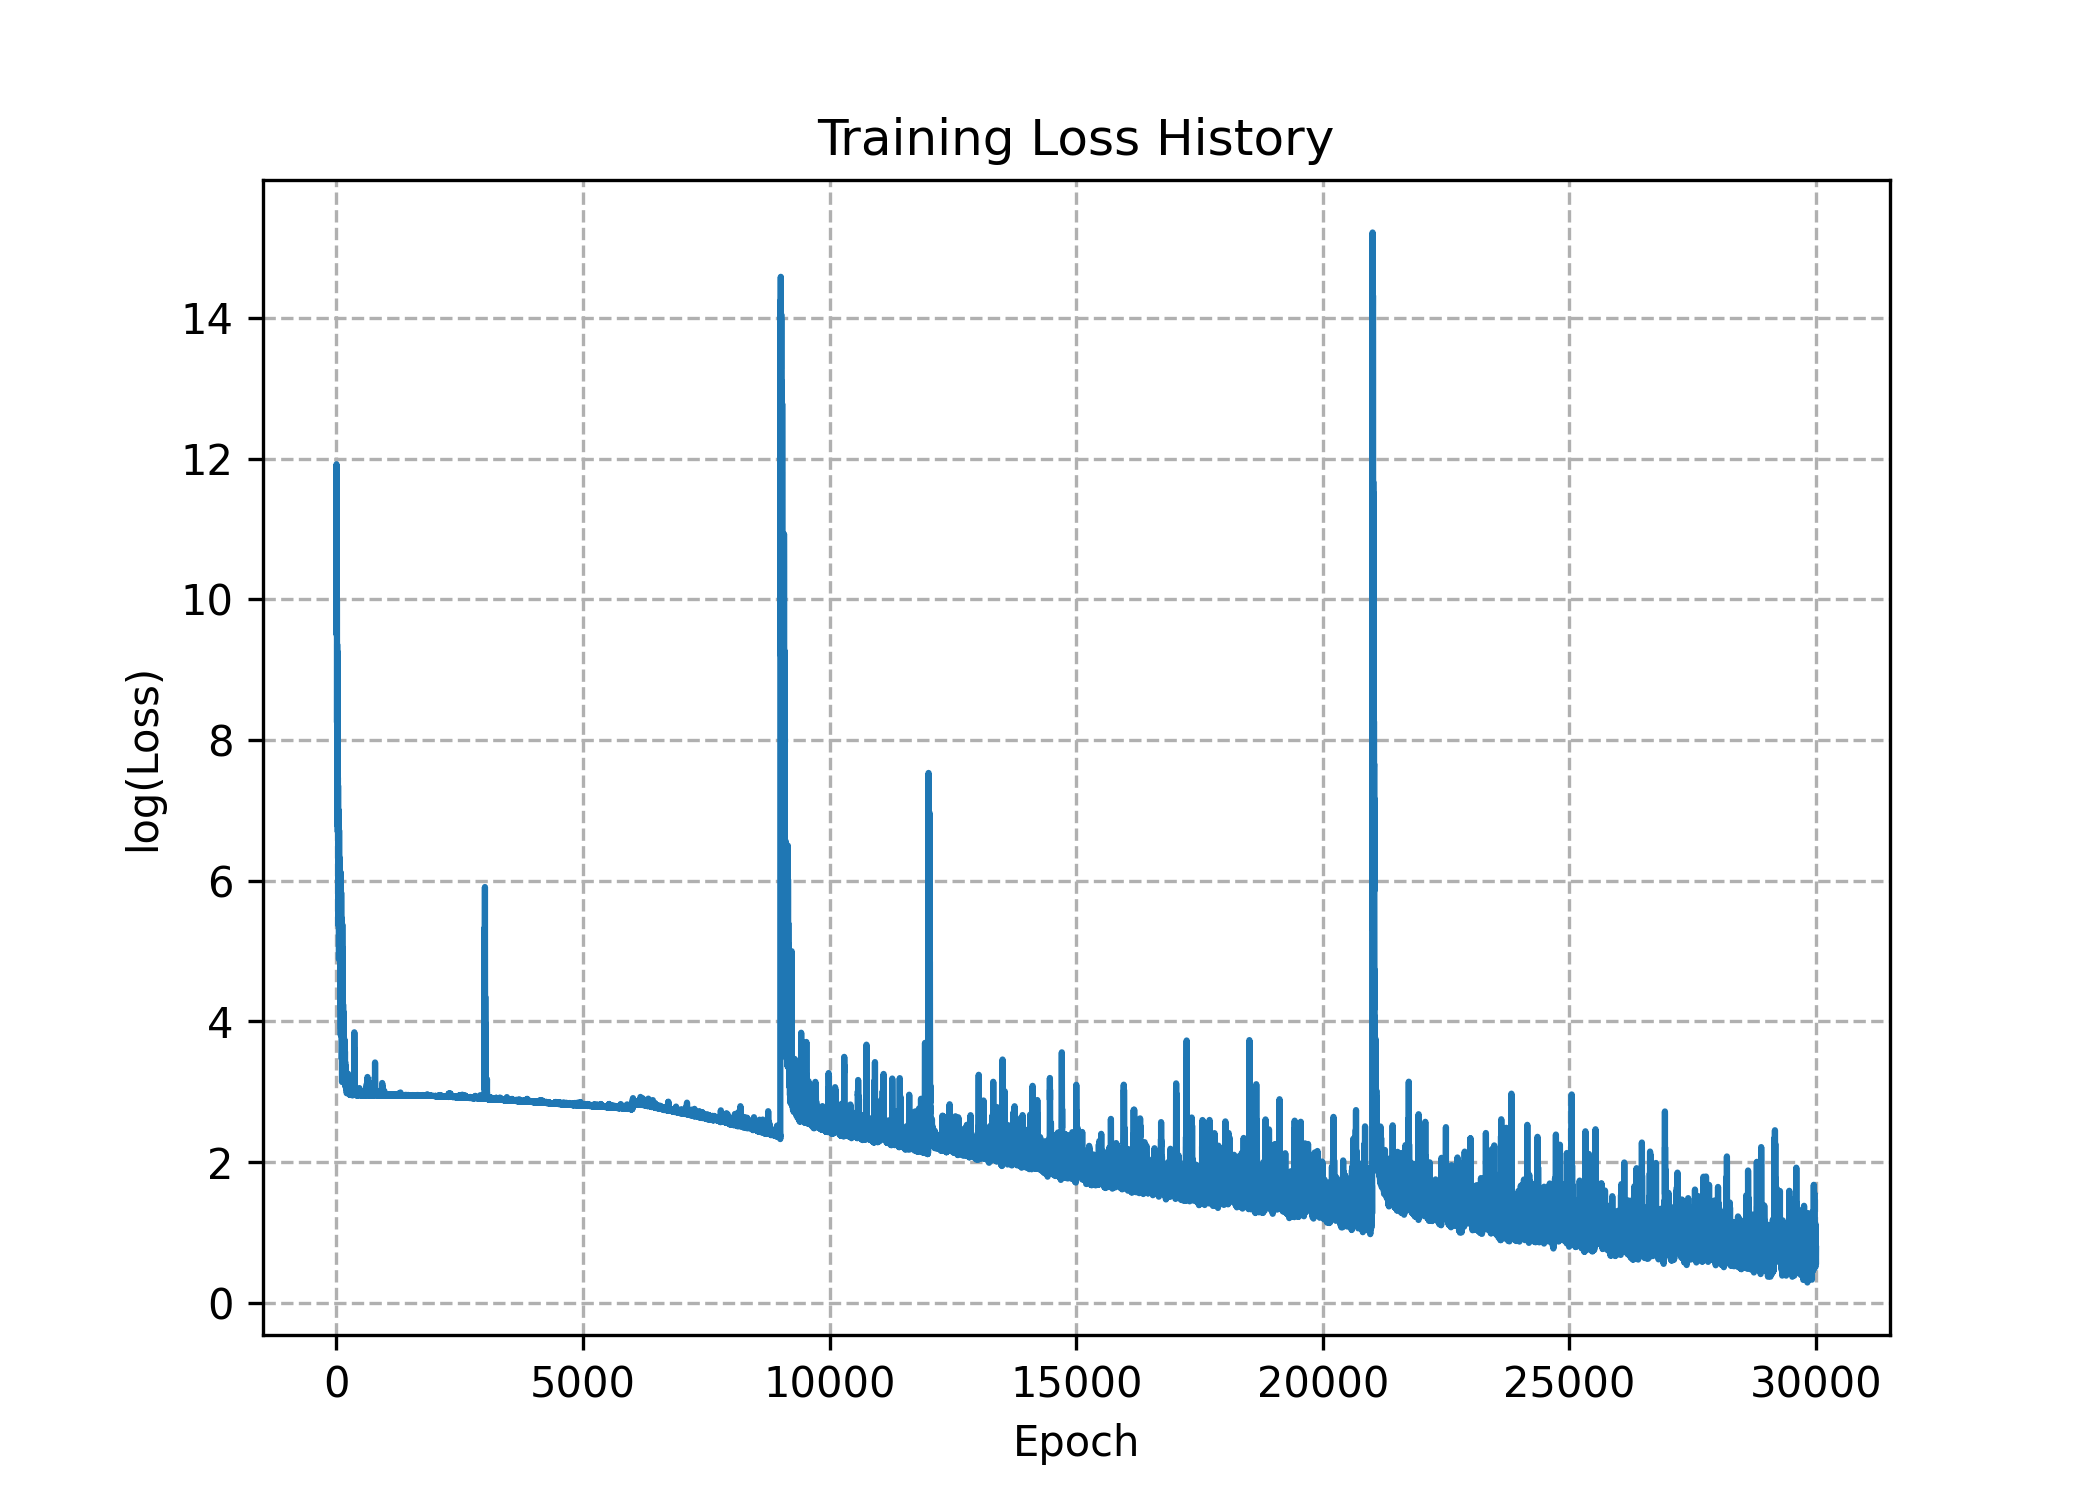

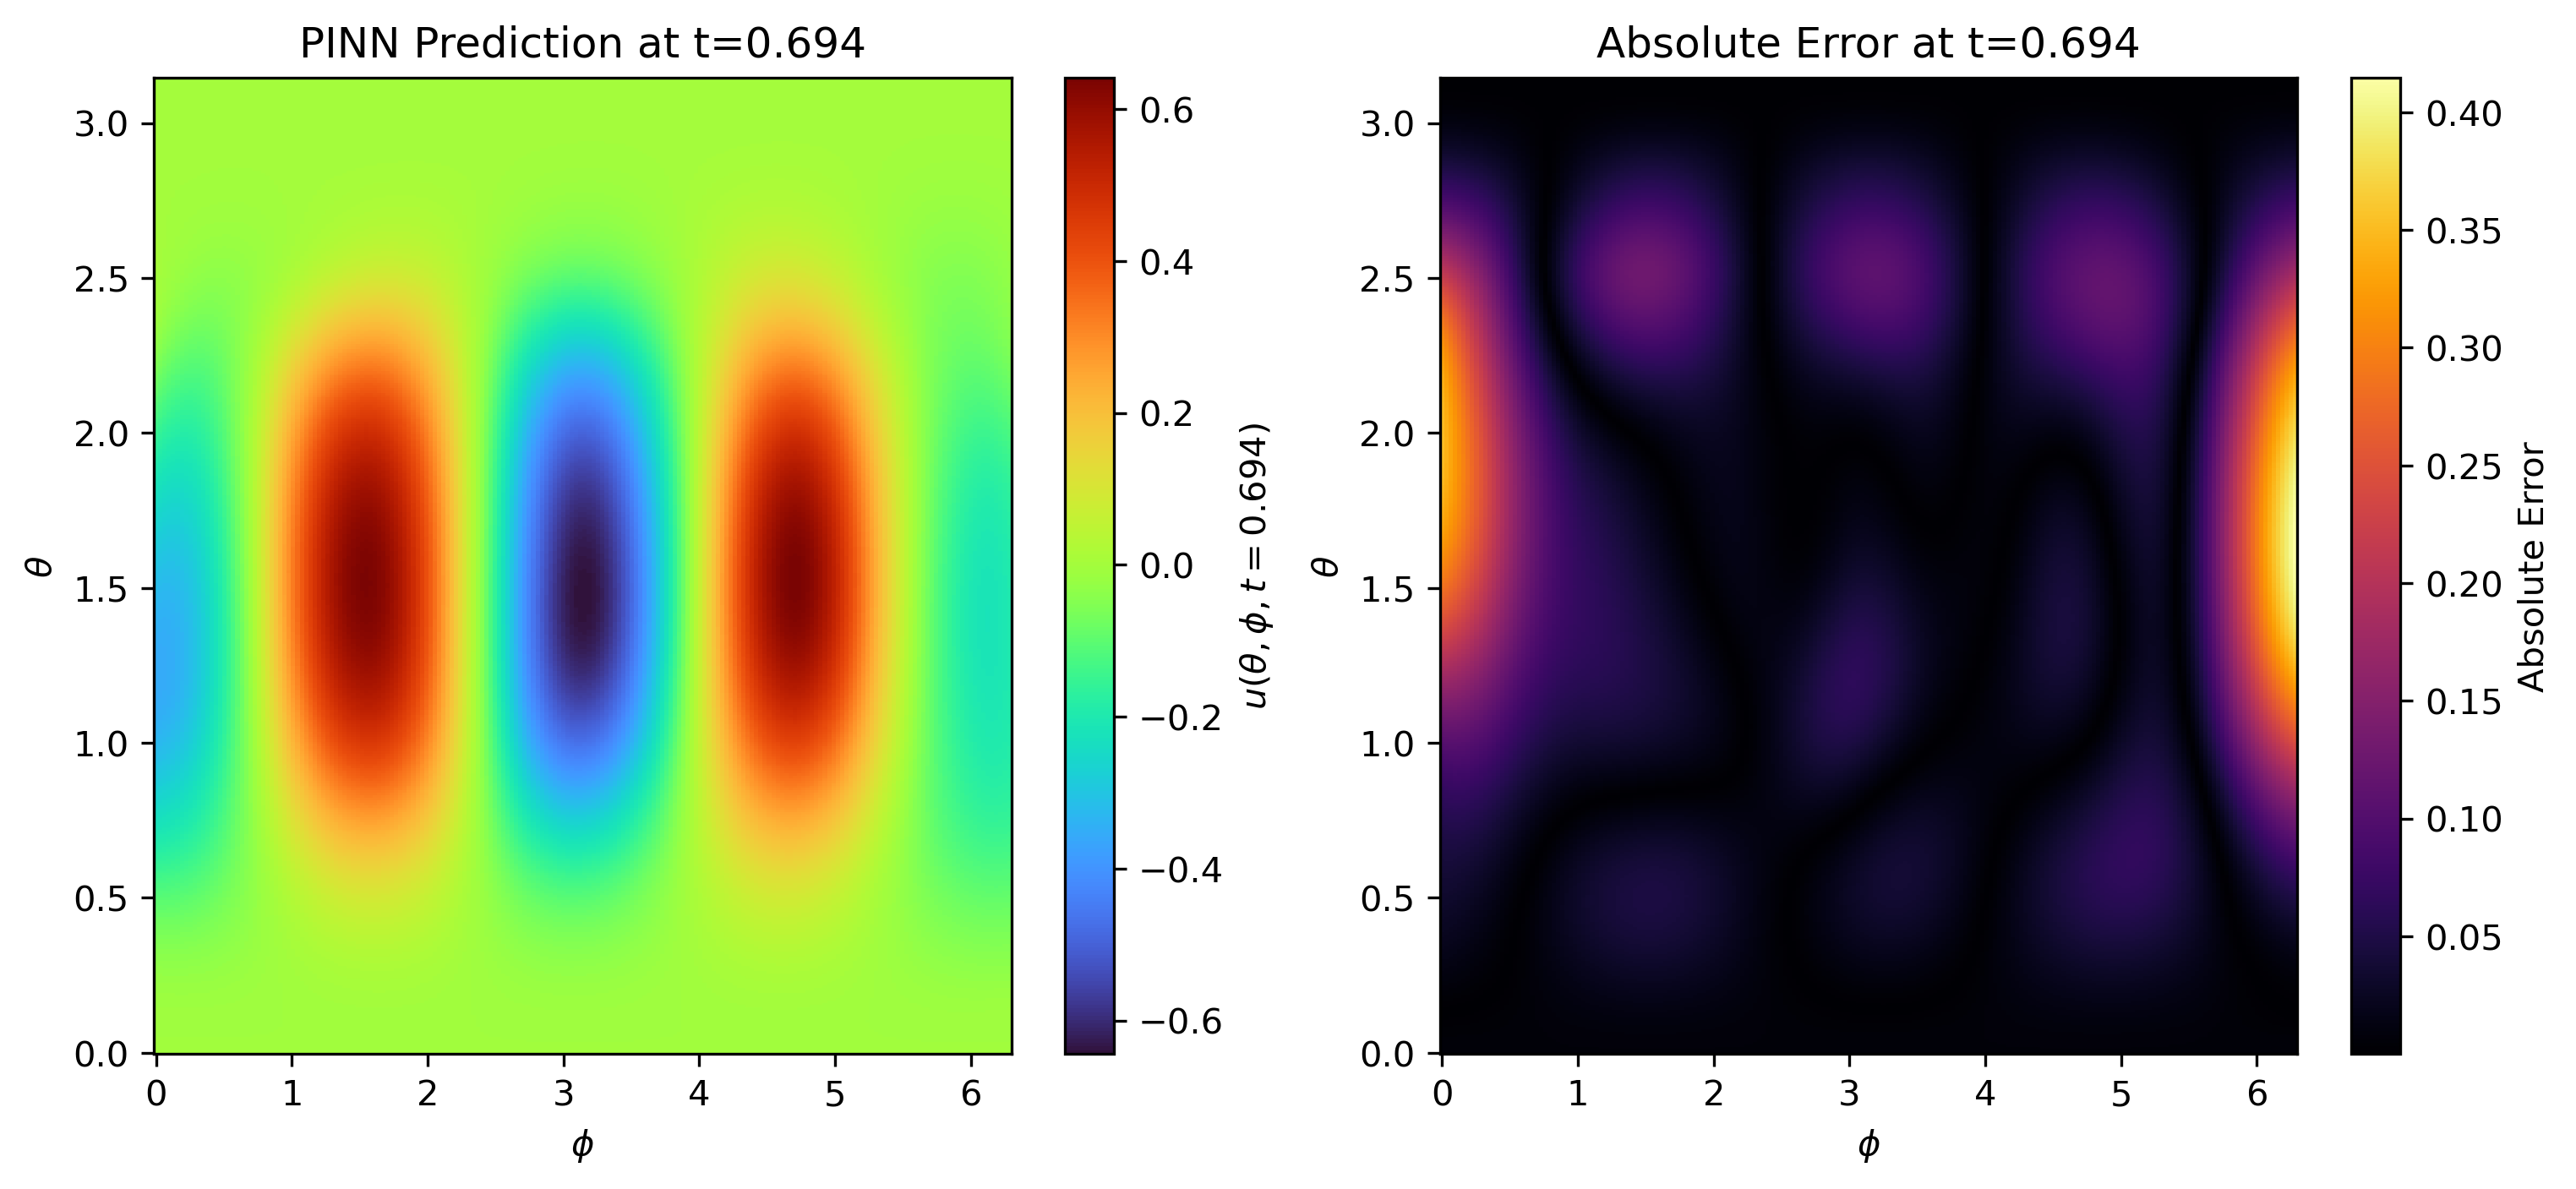

In [9]:
!python predict_3D_on2D_plot.py {time}

# Display images
ipd.display(ipd.Image(filename="lib/logs/training_loss_history.png"))
ipd.display(ipd.Image(filename=f"u3D_pred_and_error_2D_t{time:.3f}.png"))